# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

i. The primary business objective will be to optimize the pricing strategy for used cars by identifying the key factors that drive customer-perceived value.


ii. Through data analysis, the company will be able to pinpoint which attributes—such as vehicle age, condition, and mileage—are most influential in determining market price, allowing for more targeted sales strategies.


iii. By leveraging insights from regression models, the business will refine its inventory pricing to align with consumer demand, ensuring competitive yet profitable pricing.


iv. These insights will enable the business to better position its offerings, improve pricing accuracy, and enhance profitability while staying ahead of competitors in the used car market


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

a. The dataset will be analyzed through descriptive statistics for numerical variables, providing insights into the central tendency and spread of key data points.

b. Missing data will be identified and quantified to assess potential data quality issues that may need to be addressed.



c. Boxplots will be used to detect outliers in variables such as price and odometer, ensuring that extreme values are identified for further investigation.


d. Histograms and a correlation heatmap will be generated to visualize the distribution and relationships between variables, guiding future modeling decisions.

Descriptive statistics for numerical variables:
              price           year      odometer
count  4.268800e+05  425675.000000  4.224800e+05
mean   7.519903e+04    2011.235191  9.804333e+04
std    1.218228e+07       9.452120  2.138815e+05
min    0.000000e+00    1900.000000  0.000000e+00
25%    5.900000e+03    2008.000000  3.770400e+04
50%    1.395000e+04    2013.000000  8.554800e+04
75%    2.648575e+04    2017.000000  1.335425e+05
max    3.736929e+09    2022.000000  1.000000e+07

Missing values in the dataset:
id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64


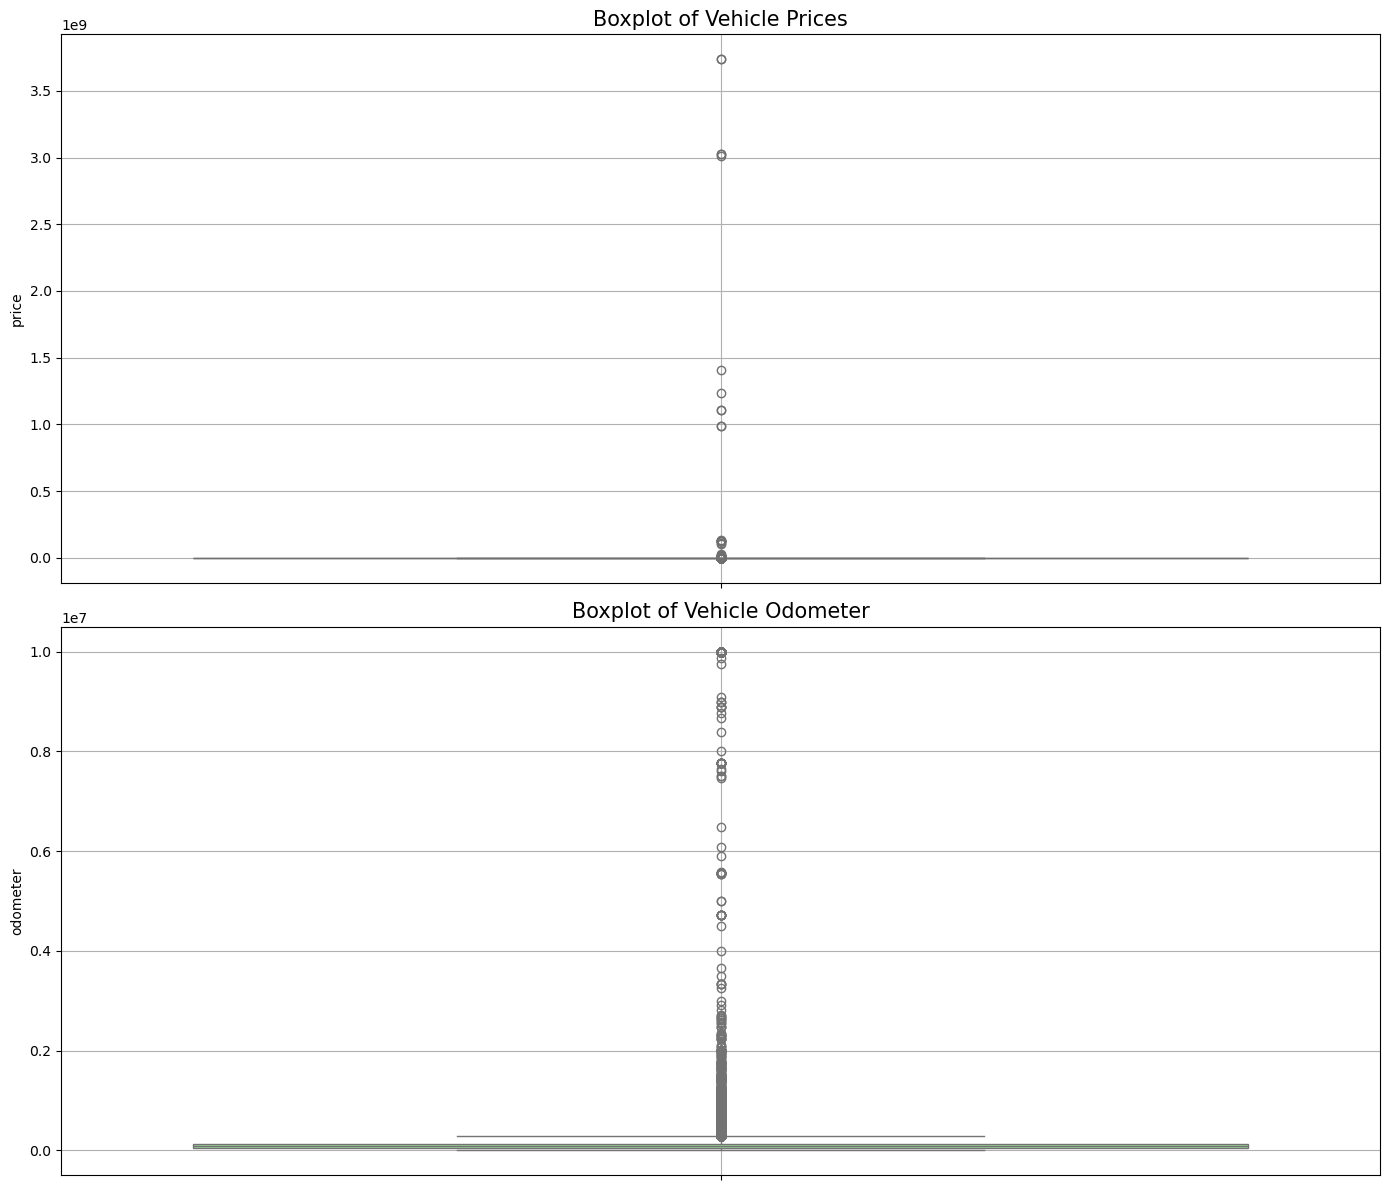

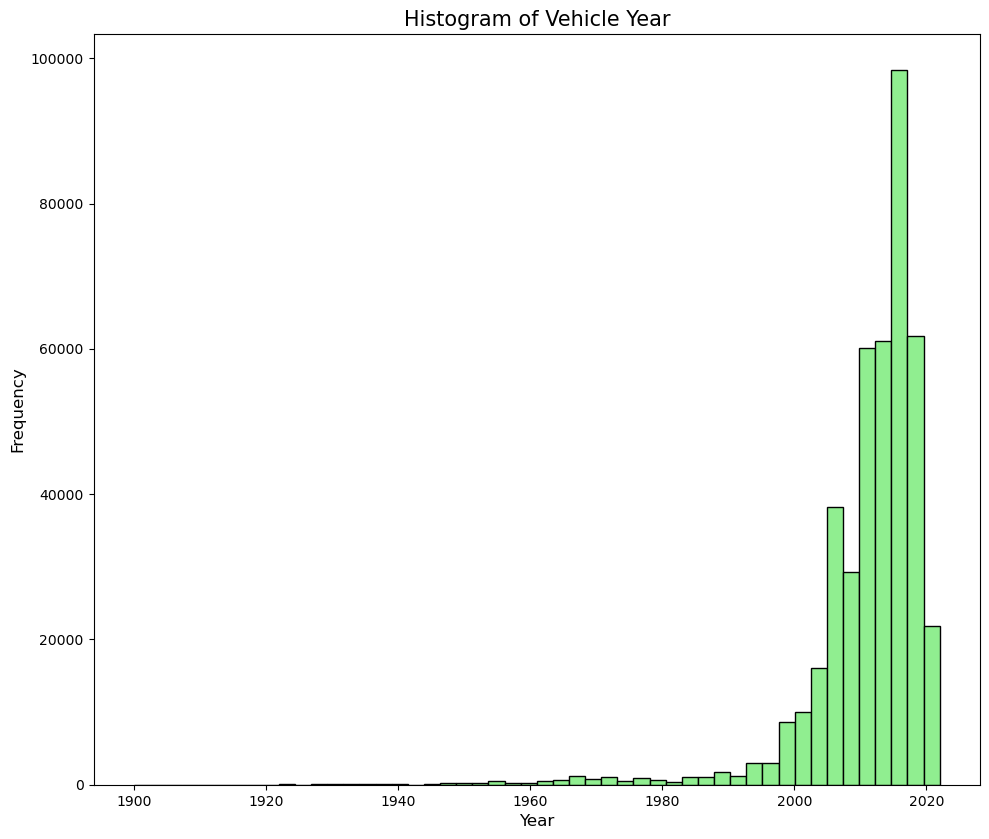

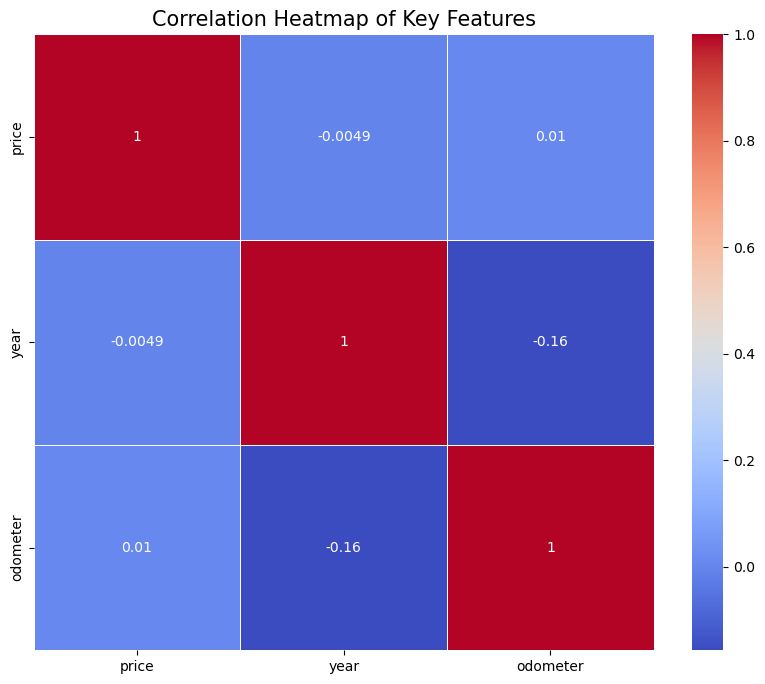

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'data/vehicles.csv'
df = pd.read_csv(file_path)

# 1. Descriptive Statistics for Numerical Variables
print("Descriptive statistics for numerical variables:")
print(df[['price', 'year', 'odometer']].describe())

# 2. Missing Data Analysis
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# 3. Outlier Detection (Boxplot for Price and Odometer)
plt.figure(figsize=(14, 12))  # Increased height for vertical layout

# Boxplot for 'Price'
plt.subplot(2, 1, 1)  # Adjusted for vertical alignment
sns.boxplot(y=df['price'], color='skyblue')
plt.title('Boxplot of Vehicle Prices', fontsize=15)
plt.grid(True)

# Boxplot for 'Odometer'
plt.subplot(2, 1, 2)  # Adjusted for vertical alignment
sns.boxplot(y=df['odometer'], color='lightgreen')
plt.title('Boxplot of Vehicle Odometer', fontsize=15)
plt.grid(True)

plt.tight_layout()
plt.show()

# 4. Data Distributions (Histograms for Price, Year, Odometer)
plt.figure(figsize=(10, 24))  # Increased height for large vertical layout


# Histogram for 'Year'
plt.subplot(3, 1, 2)
plt.hist(df['year'].dropna(), bins=50, color='lightgreen', edgecolor='black')
plt.title('Histogram of Vehicle Year', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Frequency', fontsize=12)



plt.tight_layout()
plt.show()

# 5. Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[['price', 'year', 'odometer']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Key Features', fontsize=15)
plt.show()


### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [60]:
# 1. Remove outliers using the IQR method for 'price' and 'odometer'
Q1_price = df['price'].quantile(0.25)
Q3_price = df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
price_outliers = (df['price'] < (Q1_price - 1.5 * IQR_price)) | (df['price'] > (Q3_price + 1.5 * IQR_price))

Q1_odometer = df['odometer'].quantile(0.25)
Q3_odometer = df['odometer'].quantile(0.75)
IQR_odometer = Q3_odometer - Q1_odometer
odometer_outliers = (df['odometer'] < (Q1_odometer - 1.5 * IQR_odometer)) | (df['odometer'] > (Q3_odometer + 1.5 * IQR_odometer))

# Filter the dataset to remove outliers
df_cleaned = df[~(price_outliers | odometer_outliers)]

# 2. Remove rows with missing values
df_cleaned = df_cleaned.dropna()

# 3. Remove rows where 'odometer' is 0 or negative
df_cleaned = df_cleaned[df_cleaned['odometer'] > 0]

# 4. Remove rows where 'price' is 0 or negative
df_cleaned = df_cleaned[df_cleaned['price'] > 0]

# 5. Extract numeric values from 'cylinders' and remove rows with 'others'
# Use regex to extract the numeric values from 'cylinders' column
df_cleaned['cylinders'] = df_cleaned['cylinders'].str.extract('(\d+)').astype(float)

# Remove rows where 'cylinders' is still NaN (which corresponds to 'others' or missing values)
df_cleaned = df_cleaned.dropna(subset=['cylinders'])

# 6. Verify that there are no missing values or inconsistencies
summary = df_cleaned.isnull().sum()

# 7. Check the data types of each variable
data_types = df_cleaned.dtypes

# Display a summary of the cleaned data
df_cleaned_summary = df_cleaned.describe()

# Output the summary of missing values, data types, and cleaned data
print("Summary of missing values:\n", summary)
print("\nData types of variables:\n", data_types)
print("\nSummary of cleaned data:\n", df_cleaned_summary)


Summary of missing values:
 id              0
region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
VIN             0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64

Data types of variables:
 id                int64
region           object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
state            object
dtype: object

Summary of cleaned data:
                  id         price          year     cylinders       odometer
count  3.176500e+04  31765.000000  31765.000000  31765.000

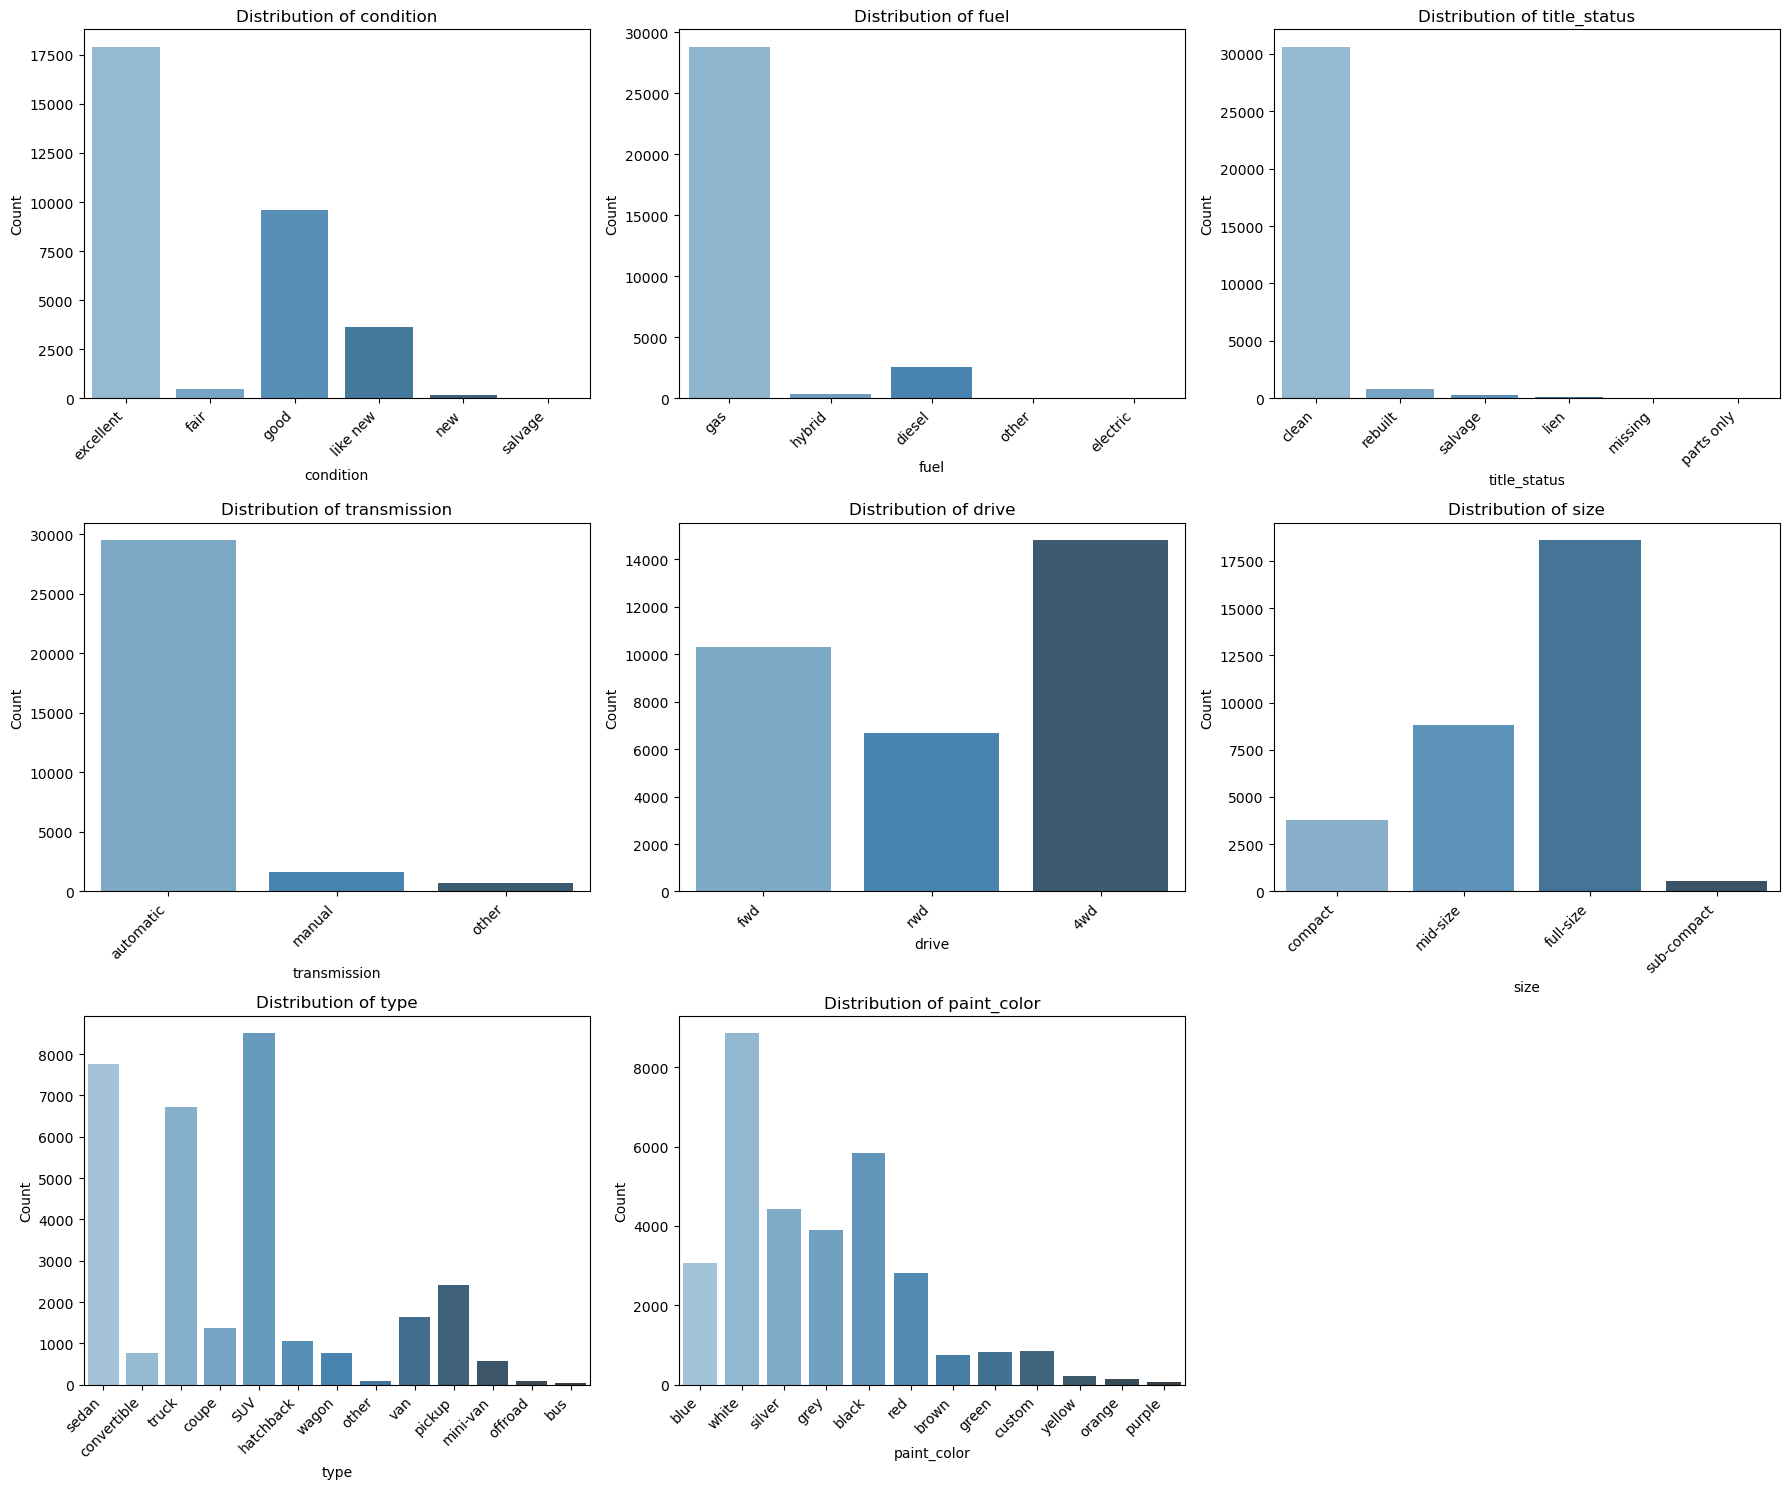

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select categorical columns with fewer than 20 unique values
categorical_columns = [col for col in df_cleaned.select_dtypes(include=['object']).columns if df_cleaned[col].nunique() <= 20]

# Drop null values for these selected categorical columns
df_cleaned_categorical = df_cleaned[categorical_columns].dropna()

# Determine the number of rows and columns for the mosaic layout
n_plots = len(categorical_columns)
n_cols = 3  # Number of columns in the mosaic
n_rows = (n_plots // n_cols) + (n_plots % n_cols > 0)  # Calculate number of rows needed

# Set up the mosaic layout for bar plots
plt.figure(figsize=(18, 5 * n_rows))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=df_cleaned_categorical, x=col, hue=col, palette='Blues_d', dodge=False, legend=False)
    plt.title(f"Distribution of {col}", fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.xlabel(col, fontsize=10)
    plt.ylabel("Count", fontsize=10)

plt.tight_layout()
plt.show()


In [62]:
# Assuming df_cleaned is your DataFrame
# Filter the categorical columns
categorical_columns = df_cleaned.select_dtypes(include=['object', 'category']).columns

# Count the unique values for each categorical column
for column in categorical_columns:
    unique_values = df_cleaned[column].nunique()
    print(f'The column "{column}" has {unique_values} unique values.')

The column "region" has 390 unique values.
The column "manufacturer" has 41 unique values.
The column "model" has 4810 unique values.
The column "condition" has 6 unique values.
The column "fuel" has 5 unique values.
The column "title_status" has 6 unique values.
The column "transmission" has 3 unique values.
The column "VIN" has 20236 unique values.
The column "drive" has 3 unique values.
The column "size" has 4 unique values.
The column "type" has 13 unique values.
The column "paint_color" has 12 unique values.
The column "state" has 51 unique values.


In [63]:
# Display the first 5 rows of the dataframe
df_cleaned.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
215,7316482063,birmingham,4000,2002.0,toyota,echo,excellent,4.0,gas,155000.0,clean,automatic,JTDBT123520243495,fwd,compact,sedan,blue,al
219,7316429417,birmingham,2500,1995.0,bmw,525i,fair,6.0,gas,110661.0,clean,automatic,WBAHD6322SGK86772,rwd,mid-size,sedan,white,al
268,7315946365,birmingham,9000,2008.0,mazda,miata mx-5,excellent,4.0,gas,56700.0,clean,automatic,JM1NC25F570128735,rwd,compact,convertible,white,al
337,7315354216,birmingham,8950,2011.0,ford,f-150,excellent,6.0,gas,164000.0,clean,automatic,1FTMF1CM6BKD55331,fwd,full-size,truck,white,al
338,7315349921,birmingham,4000,1972.0,mercedes-benz,benz,fair,6.0,gas,88100.0,clean,automatic,1.14023E+13,rwd,full-size,coupe,silver,al


In [64]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Assuming 'df_cleaned' is your original DataFrame

# Copy the original DataFrame
df_transformed = df_cleaned.copy()

# 1. Add a new feature: 'vehicle_age' (assuming current year is 2024)
current_year = 2024
df_transformed['vehicle_age'] = current_year - df_transformed['year']

# 2. Logarithmic transformations for relevant predictor variables (e.g., odometer)
df_transformed['odometer_log'] = np.log1p(df_transformed['odometer'])

# 3. Revised Ordinal encoding for 'condition', 'title_status', and 'size'
condition_order = ['salvage', 'fair', 'good', 'excellent', 'like new', 'new']
df_transformed['condition_numeric'] = pd.Categorical(df_transformed['condition'], categories=condition_order, ordered=True).codes

title_status_order = ['parts only', 'missing', 'lien', 'salvage', 'rebuilt', 'clean']
df_transformed['title_status_numeric'] = pd.Categorical(df_transformed['title_status'], categories=title_status_order, ordered=True).codes

size_order = ['sub-compact', 'compact', 'mid-size', 'full-size']
df_transformed['size_numeric'] = pd.Categorical(df_transformed['size'], categories=size_order, ordered=True).codes

# 4. One-Hot Encoding for other categorical variables, including 'manufacturer'
categorical_vars = ['fuel', 'transmission', 'drive', 'type', 'paint_color', 'manufacturer']
df_transformed = pd.get_dummies(df_transformed, columns=categorical_vars, drop_first=True)

# 5. Defining variables for regression, including 'vehicle_age' and other features
X = df_transformed[['vehicle_age', 'odometer_log', 'cylinders', 'condition_numeric', 'title_status_numeric', 'size_numeric'] + 
                   [col for col in df_transformed.columns if col.startswith(tuple(categorical_vars))]]

# 6. Scaling numerical features (if necessary) and preparing for modeling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Output the transformed DataFrame for review
print(df_transformed.head())


             id      region  price    year       model  condition  cylinders  \
215  7316482063  birmingham   4000  2002.0        echo  excellent        4.0   
219  7316429417  birmingham   2500  1995.0        525i       fair        6.0   
268  7315946365  birmingham   9000  2008.0  miata mx-5  excellent        4.0   
337  7315354216  birmingham   8950  2011.0       f-150  excellent        6.0   
338  7315349921  birmingham   4000  1972.0        benz       fair        6.0   

     odometer title_status                VIN  ... manufacturer_pontiac  \
215  155000.0        clean  JTDBT123520243495  ...                False   
219  110661.0        clean  WBAHD6322SGK86772  ...                False   
268   56700.0        clean  JM1NC25F570128735  ...                False   
337  164000.0        clean  1FTMF1CM6BKD55331  ...                False   
338   88100.0        clean        1.14023E+13  ...                False   

    manufacturer_porsche  manufacturer_ram  manufacturer_rover  \
21

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [65]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Define the target variable 'price'
y = df_transformed['price']

# Define the independent variables (ordinal, one-hot encoded, and other features)
X = df_transformed[['condition_numeric', 'title_status_numeric', 'size_numeric', 'cylinders', 
                    'vehicle_age', 'odometer_log'] + 
                   [col for col in df_transformed.columns if col.startswith(('fuel_', 'transmission_', 'drive_', 'type_', 'paint_color_', 'manufacturer_'))]]

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models: Linear Regression, Ridge, and Lasso
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso()
}

# Hyperparameter Grid Search for Ridge and Lasso
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}  # Adjust these values based on what you want to explore

# Store R-squared results for each model
r_squared_results = {}
predictions = {}
best_params = {}

# Perform 5-fold cross-validation for each model and calculate R-squared
for model_name, model in models.items():
    if model_name == 'Ridge Regression' or model_name == 'Lasso Regression':
        # Use Grid Search for Ridge and Lasso to find best alpha
        grid = GridSearchCV(model, param_grid, cv=5, scoring='r2')
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        best_params[model_name] = grid.best_params_
    else:
        best_model = model
    
    # Perform 5-fold cross-validation on the training data
    cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')
    
    # Fit the model on the training data
    best_model.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = best_model.predict(X_test)
    predictions[model_name] = y_pred
    
    # Calculate R-squared on the test set
    r_squared = r2_score(y_test, y_pred)
    
    # Store the mean cross-validation R-squared and the test R-squared
    r_squared_results[model_name] = {
        'Cross-Validation Mean R-squared': np.mean(cv_scores),
        'Test Set R-squared': r_squared
    }

# Output the results for all models
print("R-squared Results: ", r_squared_results)
print("Best Parameters (for Ridge and Lasso): ", best_params)

# Evaluation metrics
for model_name, model in models.items():
    mse = mean_squared_error(y_test, predictions[model_name])
    r_squared = r2_score(y_test, predictions[model_name])
    print(f"{model_name}:")
    print(f"  - R-squared: {r_squared}")
    print(f"  - Mean Squared Error: {mse}")

# Interpretation of Coefficients for Linear Regression, Ridge, and Lasso
# Since Ridge and Lasso perform regularization, their coefficients might differ




R-squared Results:  {'Linear Regression': {'Cross-Validation Mean R-squared': 0.6175215937999826, 'Test Set R-squared': 0.634680241445504}, 'Ridge Regression': {'Cross-Validation Mean R-squared': 0.6175266266218182, 'Test Set R-squared': 0.634667291881597}, 'Lasso Regression': {'Cross-Validation Mean R-squared': 0.617530496724809, 'Test Set R-squared': 0.6346698572130196}}
Best Parameters (for Ridge and Lasso):  {'Ridge Regression': {'alpha': 0.1}, 'Lasso Regression': {'alpha': 0.1}}
Linear Regression:
  - R-squared: 0.634680241445504
  - Mean Squared Error: 50739149.006750405
Ridge Regression:
  - R-squared: 0.634667291881597
  - Mean Squared Error: 50740947.56770218
Lasso Regression:
  - R-squared: 0.6346698572130196
  - Mean Squared Error: 50740591.26960918


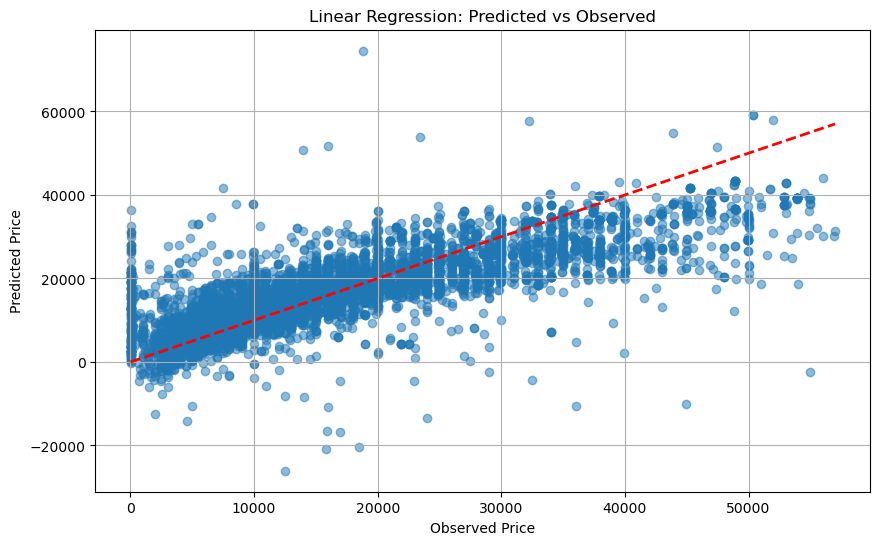

In [66]:
# --- Plotting the Predicted vs Observed values for each model ---

# 1. Linear Regression Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions['Linear Regression'], alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Linear Regression: Predicted vs Observed')
plt.xlabel('Observed Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()

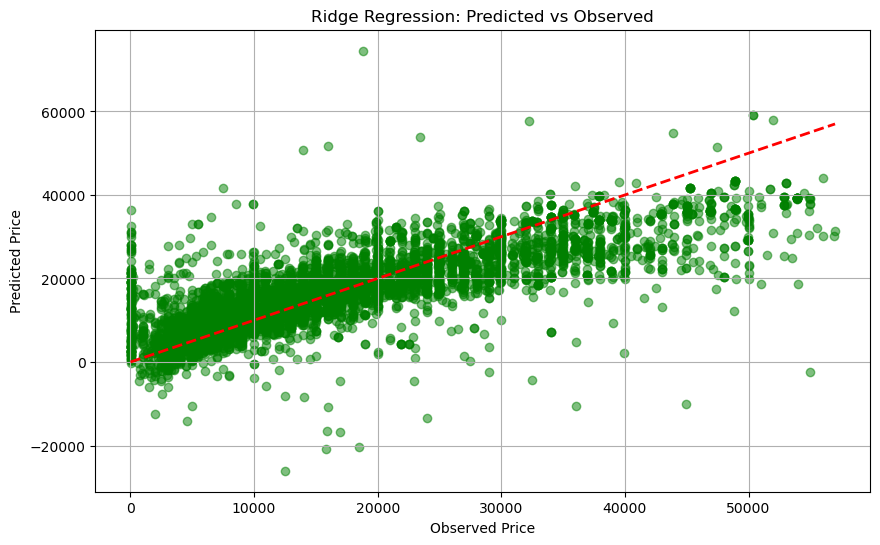

In [67]:
# 2. Ridge Regression Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions['Ridge Regression'], alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Ridge Regression: Predicted vs Observed')
plt.xlabel('Observed Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()


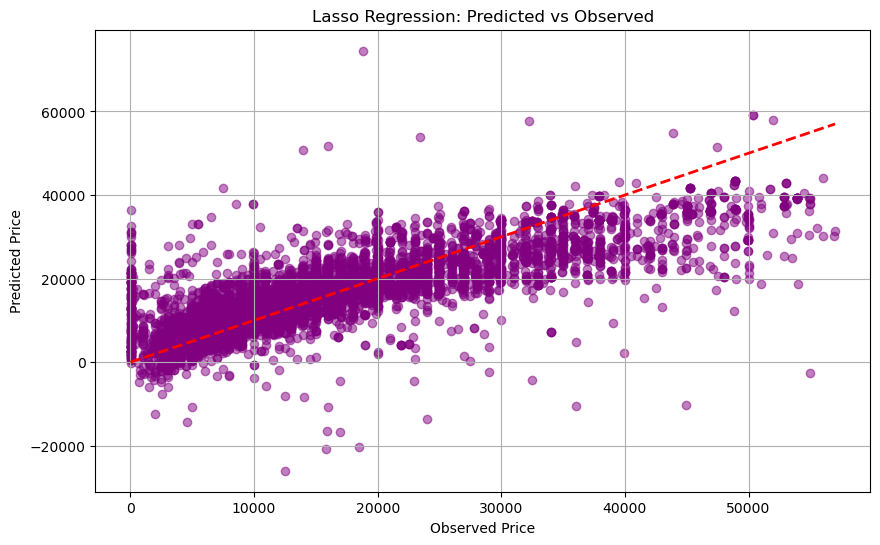

In [68]:
# 3. Lasso Regression Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions['Lasso Regression'], alpha=0.5, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Lasso Regression: Predicted vs Observed')
plt.xlabel('Observed Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()

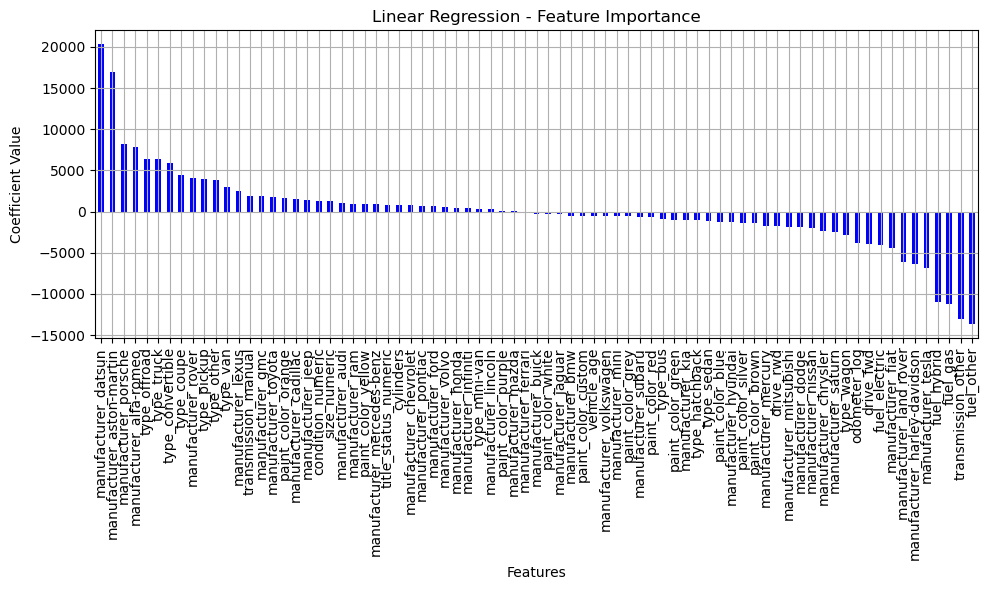

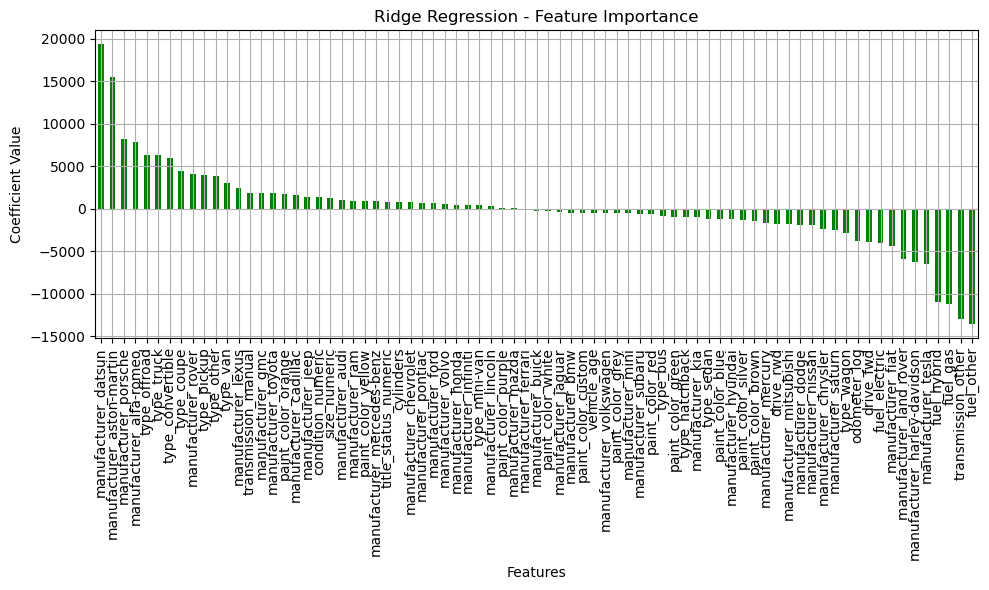

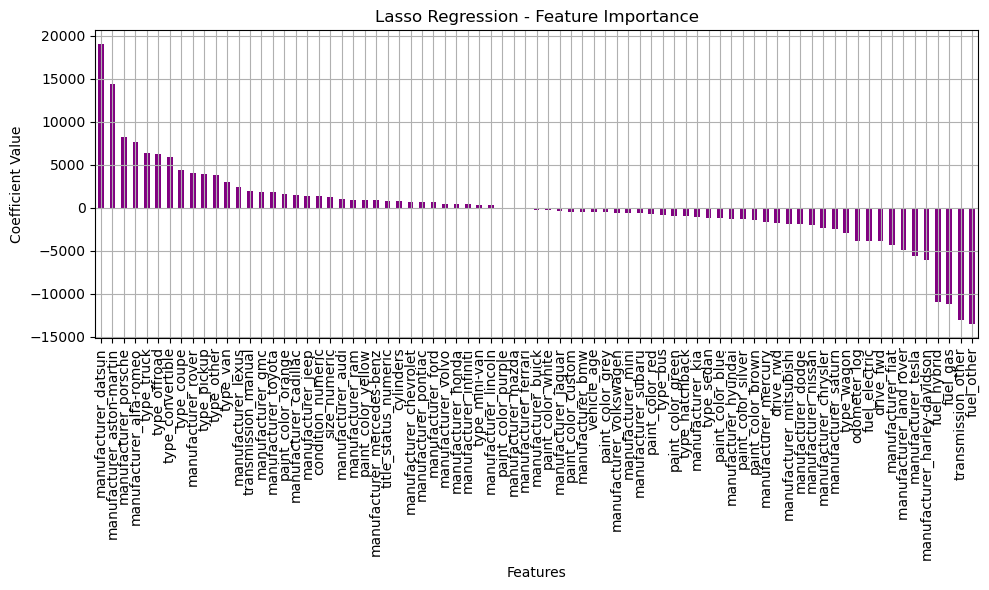

In [69]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Function to plot feature importance for a model with different colors using normal coefficients
def plot_feature_importance_colored(model, model_name, feature_names, color):
    coef = model.coef_  # Extract coefficients (without absolute values)
    feature_importance = pd.Series(coef, index=feature_names)
    
    # Sort by importance (retaining positive and negative values)
    feature_importance = feature_importance.sort_values(ascending=False)
    
    # Plot feature importance with custom color
    plt.figure(figsize=(10, 6))
    feature_importance.plot(kind='bar', color=color)
    plt.title(f'{model_name} - Feature Importance')
    plt.ylabel('Coefficient Value')
    plt.xlabel('Features')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Get feature names from X
feature_names = X.columns

# Plot feature importance for each model with different colors
plot_feature_importance_colored(models['Linear Regression'], 'Linear Regression', feature_names, color='blue')
plot_feature_importance_colored(grid_ridge.best_estimator_, 'Ridge Regression', feature_names, color='green')
plot_feature_importance_colored(grid_lasso.best_estimator_, 'Lasso Regression', feature_names, color='purple')


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

A)The consistent R-squared results across the Linear, Ridge, and Lasso models indicate good performance, but further feature exploration could enhance predictive power.


B) Vehicle age and odometer (log-transformed) are the most important features, with age increasing price and higher mileage lowering it.


C) Condition plays a significant role, with better vehicle conditions correlating to higher prices

D) Certain manufacturer and fuel type features show moderate importance, though their impact is smaller compared to age, mileage, and condition.








### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.


Key Pricing Factors: Our analysis reveals that vehicle age, mileage, and overall condition are the most significant factors influencing the price of used cars. Dealers should prioritize these variables when assessing the value of their inventory to ensure accurate pricing.



Data Entry Enhancements: Dealers must focus on improving the accuracy of their data by addressing missing information and ensuring that specific features, like the number of cylinders, are consistently recorded as numerical data to enable more precise analysis.





Mileage and Condition Impact: Cars with lower mileage and in excellent or like-new condition consistently command higher prices. Prioritizing vehicles that meet these criteria will help dealers maximize the value of their inventory and better align with customer preferences.




Model Reliability: The models we developed show a high level of accuracy and consistency, offering reliable insights into the factors that drive car pricing. Dealers can leverage these models to set competitive and market-appropriate prices for their used cars.



Optimizing Pricing Strategy: By using these data-driven insights and models, dealers can better align their pricing strategies with market demand, ensuring their inventory is priced competitively while maintaining profitability and customer satisfaction.
